Lessons learned: before drawing any conclusions from analysis, should review the assumptions of the model and see if the violation of any will cause change in result. Esp for this problem: 
1. should check for collinearity before rejecting variables based on p-value
2. should dis-include outliers and high leverage points before determining the model coefficients

In [1]:
import pandas as pd
import numpy as np
import math

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

n = 100 
x1 = np.random.uniform(size = n)
x2 = 0.5 * x1 + np.random.normal(size = n) / 10.0

y = 2 + 2.0 * x1 + 0.3 * x2 + np.random.normal(size = n)

14 - (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

correlation between x1 & x2:  0.8192633558220391


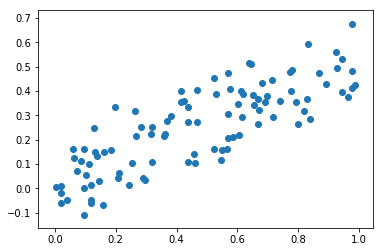

In [3]:
print('correlation between x1 & x2: ', np.corrcoef(x1, x2)[0][1])
plt.scatter(x1, x2)

14 - (c) Using this data, fit a least squares regression to predict y using x1 and x2

In [4]:
X = pd.DataFrame(np.hstack( (x1.reshape(n, 1), x2.reshape(n, 1)) ), columns = ['x1', 'x2'])
xx = sm.add_constant(X)
results0 = sm.OLS(y, xx).fit()

In [5]:
print(results0.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.16
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           4.16e-07
Time:                        21:12:00   Log-Likelihood:                -139.04
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9217      0.191     10.071      0.0

14 - (d) Now fit a least squares regression to predict y using only x1.

In [6]:
results1 = sm.OLS(y, xx.drop(['x2'], axis = 1)).fit()

In [7]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.76e-07
Time:                        21:12:00   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9548      0.191     10.247      0.0

14 - (e) Now fit a least squares regression to predict y using only x2.

In [8]:
results2 = sm.OLS(y, xx.drop(['x1'], axis = 1)).fit()

In [9]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.37
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           4.29e-07
Time:                        21:12:00   Log-Likelihood:                -141.09
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0721      0.178     11.623      0.0

14 - (g) Now suppose we obtain one additional observation, which was unfortunately mismeasured: x1 = 0.1, x2 = 0.8, y = 6. Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both?

In [10]:
x12 = np.hstack((x1, 0.1))
x22 = np.hstack((x2, 0.8))
y2  = np.hstack((y,  6))

In [11]:
X2 = pd.DataFrame(np.hstack( (x12.reshape(n+1, 1), x22.reshape(n+1, 1)) ), columns = ['x1', 'x2'])
xx = sm.add_constant(X2)
results0 = sm.OLS(y2, xx).fit()

the added point is an outlier to x1 and of high leverage to x2, thus lowering the P-value for x2 while significantly increasing it for x1

In [12]:
print(results0.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     18.85
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.18e-07
Time:                        21:12:00   Log-Likelihood:                -142.48
No. Observations:                 101   AIC:                             291.0
Df Residuals:                      98   BIC:                             298.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9480      0.194     10.025      0.0

since the added point is an outlier, it lowers the performance of the model (lowered R-squared)

In [13]:
results1 = sm.OLS(y2, xx.drop(['x2'], axis = 1)).fit()

In [14]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     23.57
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           4.50e-06
Time:                        21:12:00   Log-Likelihood:                -148.13
No. Observations:                 101   AIC:                             300.3
Df Residuals:                      99   BIC:                             305.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0719      0.201     10.315      0.0

the 'false' increase of R-squared and decrease of P value is caused by the fact that the added point is of high leverage to x2-y

In [15]:
results2 = sm.OLS(y2, xx.drop(['x1'], axis = 1)).fit()

In [16]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     36.88
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           2.33e-08
Time:                        21:12:00   Log-Likelihood:                -142.93
No. Observations:                 101   AIC:                             289.9
Df Residuals:                      99   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0255      0.176     11.531      0.0

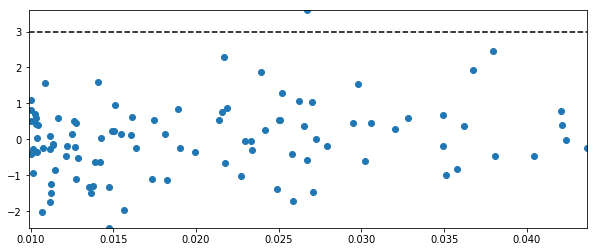

In [17]:
infl = results1.get_influence()
resd_std = infl.resid_studentized_internal
hatDiag  = infl.hat_diag_factor
hi0 = (1 + 1 - 2) / (n+1)
plt.figure(figsize = (10, 4))
plt.scatter(hatDiag, resd_std)
plt.plot([1/(n+1), max(hatDiag)], [-3, -3], '--k')
plt.plot([1/(n+1), max(hatDiag)], [3, 3], '--k')
plt.plot([hi0, hi0], [min(resd_std), max(resd_std)], '-.k')
ax = plt.axis([1/(n+1), max(hatDiag), min(resd_std), max(resd_std)])

In [18]:
resd_std[-1]

3.587715311842814

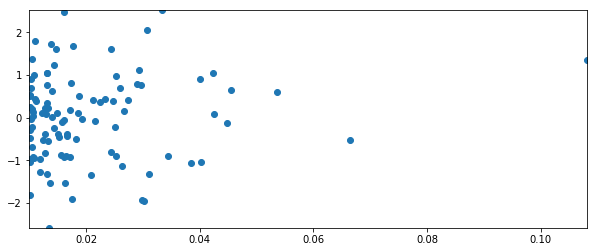

In [19]:
infl = results2.get_influence()
resd_std = infl.resid_studentized_internal
hatDiag  = infl.hat_diag_factor
hi0 = (1 + 1 - 2) / (n+1)
plt.figure(figsize = (10, 4))
plt.scatter(hatDiag, resd_std)
plt.plot([1/(n+1), max(hatDiag)], [-3, -3], '--k')
plt.plot([1/(n+1), max(hatDiag)], [3, 3], '--k')
plt.plot([hi0, hi0], [min(resd_std), max(resd_std)], '-.k')
ax = plt.axis([1/(n+1), max(hatDiag), min(resd_std), max(resd_std)])

In [20]:
hatDiag[-1]

0.1081806536511256